# McKinney Chapter 10 - Practice for Section 05

## Announcements

1. I will grade your projects over spring break
2. Please complete your peer reviews on Teammates by midnight on Tuesday, 2/27
3. I will record the week 9 lecture video on Thursday
4. Enjoy your spring breaks!

## 10-Minute Recap

We will focus on 3 topics from chapter 10 of McKinney:

1. *GroupBy Mechanics:* We will use the `.groupby()` method to perform "split-apply-combine" calculations in pandas, which let us aggregate data by one of more columns or indexes.
2. *Data Aggregation:* We will combine optimized methods, like `.count()`, `.sum()`, `.mean()`, etc., with `.groupby()` to quickly aggregate data. We will combine the `.agg()` or `.aggregate()` method with `.groupby()` when we want to apply more than one aggregation function.
3. *Pivot Tables:* We can use the `.pivot_table()` method to aggregate data with a syntax similar to Excel's pivot tables. We can almost always get the same output with the `.groupby()`, `.agg()`, and `.unstack()` methods.

## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

### Replicate the following `.pivot_table()` output with `.groupby()`

In [3]:
ind = (
    yf.download(tickers='^GSPC ^DJI ^IXIC ^FTSE ^N225 ^HSI')
    .rename_axis(columns=['Variable', 'Index'])
    .stack()
)

[*********************100%%**********************]  6 of 6 completed


In [4]:
np.allclose(
    ind['Adj Close'],
    ind['Close']
)

True

Here is the `.pivot_table()` solution.
In most cases, the `.pivot_table()` is easier to interpret because it explicitly selects rows and columns (i.e., the `index` and `columns` arguments).

In [5]:
a = (
    ind
    .loc['2015':]
    .reset_index()
    .pivot_table(
        values='Close',
        index=pd.Grouper(key='Date', freq='A'),
        columns='Index',
        aggfunc=['min', 'max']
    )
)

a

min                                                       \
Index            ^DJI     ^FTSE     ^GSPC       ^HSI      ^IXIC      ^N225   
Date                                                                         
2015-12-31 15666.4404 5874.1001 1867.6100 20556.5996  4506.4902 16795.9609   
2016-12-31 15660.1797 5537.0000 1829.0800 18319.5801  4266.8398 14952.0195   
2017-12-31 19732.4004 7099.2002 2257.8301 22134.4707  5429.0801 18335.6309   
2018-12-31 21792.1992 6584.7002 2351.1001 24585.5293  6192.9199 19155.7402   
2019-12-31 22686.2207 6692.7002 2447.8899 25064.3594  6463.5000 19561.9609   
2020-12-31 18591.9297 4993.8999 2237.3999 21696.1309  6860.6699 16552.8301   
2021-12-31 29982.6191 6407.5000 3700.6499 22744.8594 12609.1602 27013.2500   
2022-12-31 28725.5098 6826.2002 3577.0300 14687.0195 10213.2900 24717.5293   
2023-12-31 31819.1406 7256.8999 3808.1001 16201.4902 10305.2402 25716.8594   
2024-12-31 37266.6719 7446.2998 4688.6802 14961.1797 14510.2998 33288.2891   

                  max                                                       
Index            ^DJI     ^FTSE     ^GSPC       ^HSI      ^IXIC      ^N225  
Date                                                                        
2015-12-31 18312.3906 7104.0000 2130.8201 28442.7500  5218.8599 20868.0293  
2016-12-31 19974.6191 7142.7998 2271.7200 24099.6992  5487.4399 19494.5293  
2017-12-31 24837.5098 7687.7998 2690.1599 30003.4902  6994.7598 22939.1797  
2018-12-31 26828.3906 7877.5000 2930.7500 33154.1211  8109.6899 24270.6191  
2019-12-31 28645.2598 7686.6001 3240.0200 30157.4902  9022.3896 24066.1191  
2020-12-31 30606.4805 7674.6001 3756.0701 29056.4199 12899.4199 27568.1504  
2021-12-31 36488.6289 7420.7002 4793.0601 31084.9395 16057.4404 30670.0996  
2022-12-31 36799.6484 7672.3999 4796.5601 24965.5508 15832.7998 29332.1602  
2023-12-31 37710.1016 8014.2998 4783.3501 22688.9004 15099.1797 33753.3281  
2024-12-31 39131.5312 7728.5000 5096.2700 16790.8008 16091.9199 39910.8203

Here is the `.groupby()` equivalent!

In [6]:
b = (
    ind
    .loc['2015':]
    .reset_index()
    .groupby([pd.Grouper(key='Date', freq='A'), 'Index'])
    ['Close']
    .agg(['min', 'max'])
    .unstack()
)

b

min                                                       \
Index            ^DJI     ^FTSE     ^GSPC       ^HSI      ^IXIC      ^N225   
Date                                                                         
2015-12-31 15666.4404 5874.1001 1867.6100 20556.5996  4506.4902 16795.9609   
2016-12-31 15660.1797 5537.0000 1829.0800 18319.5801  4266.8398 14952.0195   
2017-12-31 19732.4004 7099.2002 2257.8301 22134.4707  5429.0801 18335.6309   
2018-12-31 21792.1992 6584.7002 2351.1001 24585.5293  6192.9199 19155.7402   
2019-12-31 22686.2207 6692.7002 2447.8899 25064.3594  6463.5000 19561.9609   
2020-12-31 18591.9297 4993.8999 2237.3999 21696.1309  6860.6699 16552.8301   
2021-12-31 29982.6191 6407.5000 3700.6499 22744.8594 12609.1602 27013.2500   
2022-12-31 28725.5098 6826.2002 3577.0300 14687.0195 10213.2900 24717.5293   
2023-12-31 31819.1406 7256.8999 3808.1001 16201.4902 10305.2402 25716.8594   
2024-12-31 37266.6719 7446.2998 4688.6802 14961.1797 14510.2998 33288.2891   

                  max                                                       
Index            ^DJI     ^FTSE     ^GSPC       ^HSI      ^IXIC      ^N225  
Date                                                                        
2015-12-31 18312.3906 7104.0000 2130.8201 28442.7500  5218.8599 20868.0293  
2016-12-31 19974.6191 7142.7998 2271.7200 24099.6992  5487.4399 19494.5293  
2017-12-31 24837.5098 7687.7998 2690.1599 30003.4902  6994.7598 22939.1797  
2018-12-31 26828.3906 7877.5000 2930.7500 33154.1211  8109.6899 24270.6191  
2019-12-31 28645.2598 7686.6001 3240.0200 30157.4902  9022.3896 24066.1191  
2020-12-31 30606.4805 7674.6001 3756.0701 29056.4199 12899.4199 27568.1504  
2021-12-31 36488.6289 7420.7002 4793.0601 31084.9395 16057.4404 30670.0996  
2022-12-31 36799.6484 7672.3999 4796.5601 24965.5508 15832.7998 29332.1602  
2023-12-31 37710.1016 8014.2998 4783.3501 22688.9004 15099.1797 33753.3281  
2024-12-31 39131.5312 7728.5000 5096.2700 16790.8008 16091.9199 39910.8203

The `.pivot_table()` and `.groupby()` results have the same values!

In [7]:
np.allclose(a, b)

True

### Calulate the mean and standard deviation of returns by ticker for the MATANA (MSFT, AAPL, TSLA, AMZN, NVDA, and GOOG) stocks

Consider only dates with complete returns data.
Try this calculation with wide and long data frames, and confirm your results are the same.

In [8]:
matana = (
    yf.download(tickers='MSFT AAPL TSLA AMZN NVDA GOOG')
    .rename_axis(columns=['Variable', 'Ticker'])
)

[*********************100%%**********************]  6 of 6 completed


We can add the returns columns first, using the `pd.MultiIndex` trick from a few weeks ago.

In [9]:
_ = pd.MultiIndex.from_product([['Return'], matana['Adj Close'].columns])
matana[_] = (
    matana['Adj Close'] # select adjusted close prices
    .iloc[:-1] # drop the last price to avoid using intraday prices
    .pct_change() # calculate returns
)

We can use `.agg()` without `.pivot_table()` or `.groupby()`!
We have wide data, so the tickers will be in the columns.

In [10]:
a = (
    matana
    .dropna()
    ['Return']
    .agg(['mean', 'std'])
)

a

Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
mean,0.0011,0.0012,0.0009,0.0010,0.0021,0.0020
std,0.0176,0.0207,0.0172,0.0163,0.0283,0.0358


We need a long data frame to use `.pivot_table()` and `.groupby()` methods.
Here is the `.pivot_table()` solution.

In [11]:
b = (
    matana
    .dropna()
    ['Return']
    .stack() # create long data
    .to_frame('Return') # .pivot_table() requires a data frame
    .pivot_table(
        values='Return',
        index='Ticker',
        aggfunc=['mean', 'std']
    )
    .transpose() # transpose to put tickers in columns
)

b

,Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
mean,Return,0.0011,0.0012,0.0009,0.0010,0.0021,0.0020
std,Return,0.0176,0.0207,0.0172,0.0163,0.0283,0.0358


In [12]:
np.allclose(a, b)

True

Here is the `.groupby()` solution.

In [13]:
c = (
    matana
    .dropna()
    ['Return']
    .stack() # create long data
    .groupby('Ticker')
    .agg(['mean', 'std'])
    .transpose() # transpose to put tickers in columns
)

b

,Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
mean,Return,0.0011,0.0012,0.0009,0.0010,0.0021,0.0020
std,Return,0.0176,0.0207,0.0172,0.0163,0.0283,0.0358


In [14]:
np.allclose(a, c)

True

### Calculate the mean and standard deviation of returns and the maximum of closing prices by ticker for the MATANA stocks

Again, consider only dates with complete returns data.
Try this calculation with wide and long data frames, and confirm your results are the same.

In [15]:
a = (
    matana
    .dropna()
    .stack()
    .pivot_table(
        index='Ticker',
        aggfunc={'Close': 'max', 'Return': ['mean', 'std']}
    )
)

a

Variable    Close Return       
              max   mean    std
Ticker                         
AAPL     198.1100 0.0011 0.0176
AMZN     186.5705 0.0012 0.0207
GOOG     154.8400 0.0009 0.0172
MSFT     420.5500 0.0010 0.0163
NVDA     790.9200 0.0021 0.0283
TSLA     409.9700 0.0020 0.0358

In [16]:
b = (
    matana
    .dropna()
    .stack()
    .groupby('Ticker')
    .agg({'Close': 'max', 'Return': ['mean', 'std']})
)

b

Variable    Close Return       
              max   mean    std
Ticker                         
AAPL     198.1100 0.0011 0.0176
AMZN     186.5705 0.0012 0.0207
GOOG     154.8400 0.0009 0.0172
MSFT     420.5500 0.0010 0.0163
NVDA     790.9200 0.0021 0.0283
TSLA     409.9700 0.0020 0.0358

In [17]:
np.allclose(a, b)

True

---

We can use the following code to display all index levels for all rows and columns.

In [18]:
with pd.option_context('display.multi_sparse', False):
    display(b)

Variable,Close,Return,Return
,max,mean,std
Ticker,,,
AAPL,198.1100,0.0011,0.0176
AMZN,186.5705,0.0012,0.0207
GOOG,154.8400,0.0009,0.0172
MSFT,420.5500,0.0010,0.0163
NVDA,790.9200,0.0021,0.0283
TSLA,409.9700,0.0020,0.0358


If we prefer to see all index levels all the time, we can set the following setting at the top of our notebook:

```
pd.options.display.multi_sparse = False
```


We can also copy our output to our clipboaerd then paste it into Excel if we want to convince ourelves of the column multi index arrangement.

In [19]:
b.to_clipboard()

---

### Calculate monthly means and volatilities for SPY and GOOG returns

In [20]:
spy_goog = (
    yf.download(tickers='SPY GOOG')
    .rename_axis(columns=['Variable', 'Ticker'])
)

spy_goog

[*********************100%%**********************]  2 of 2 completed


Variable   Adj Close             Close              High               Low  \
Ticker          GOOG      SPY     GOOG      SPY     GOOG      SPY     GOOG   
Date                                                                         
1993-01-29       NaN  24.8407      NaN  43.9375      NaN  43.9688      NaN   
1993-02-01       NaN  25.0173      NaN  44.2500      NaN  44.2500      NaN   
1993-02-02       NaN  25.0704      NaN  44.3438      NaN  44.3750      NaN   
1993-02-03       NaN  25.3354      NaN  44.8125      NaN  44.8438      NaN   
1993-02-04       NaN  25.4414      NaN  45.0000      NaN  45.0938      NaN   
...              ...      ...      ...      ...      ...      ...      ...   
2024-02-23  145.2900 507.8500 145.2900 507.8500 145.9550 510.1300 144.7900   
2024-02-26  138.7500 505.9900 138.7500 505.9900 143.8400 508.7500 138.7400   
2024-02-27  140.1000 506.9300 140.1000 506.9300 140.4900 507.1600 138.5000   
2024-02-28  137.4300 506.2600 137.4300 506.2600 139.2800 506.8600 136.6400   
2024-02-29  139.7800 508.0800 139.7800 508.0800 139.9500 509.7400 137.5700   

Variable                Open                 Volume            
Ticker          SPY     GOOG      SPY          GOOG       SPY  
Date                                                           
1993-01-29  43.7500      NaN  43.9688           NaN   1003200  
1993-02-01  43.9688      NaN  43.9688           NaN    480500  
1993-02-02  44.1250      NaN  44.2188           NaN    201300  
1993-02-03  44.3750      NaN  44.4062           NaN    529400  
1993-02-04  44.4688      NaN  44.9688           NaN    531500  
...             ...      ...      ...           ...       ...  
2024-02-23 507.1000 144.9700 509.2700 14508400.0000  61284200  
2024-02-26 505.8600 143.4500 508.3000 33513000.0000  50386700  
2024-02-27 504.7500 139.4100 506.7000 22364000.0000  48854500  
2024-02-28 504.9600 139.1000 505.3300 30628700.0000  56506600  
2024-02-29 505.3500 138.3500 508.0700 35447100.0000  83824300  

[7827 rows x 12 columns]

In [53]:
spy_goog_m = (
    spy_goog['Adj Close'] # select adj close columns
    .iloc[:-1] # drop last row, which is often intraday or missing
    .pct_change() # calculate daily returns
    .stack() # stack to long
    .to_frame('Return') # name returns column
    .reset_index() # add date and ticker as columns
    .groupby([pd.Grouper(key='Date', freq='M'), 'Ticker']) # group by month and ticker
    .agg(['mean', 'std']) # calulate mean and std
    .rename_axis(columns=['Variable', 'Statistic'])
)

spy_goog_m

Variable           Return       
Statistic            mean    std
Date       Ticker               
1993-02-28 SPY     0.0006 0.0080
1993-03-31 SPY     0.0010 0.0071
1993-04-30 SPY    -0.0012 0.0074
1993-05-31 SPY     0.0014 0.0071
1993-06-30 SPY     0.0002 0.0060
...                   ...    ...
2023-12-31 SPY     0.0023 0.0060
2024-01-31 GOOG    0.0005 0.0202
           SPY     0.0008 0.0070
2024-02-29 GOOG   -0.0015 0.0157
           SPY     0.0025 0.0079

[608 rows x 2 columns]

### Plot the monthly means and volatilities from the previous exercise

<Axes: xlabel='Date,Ticker'>

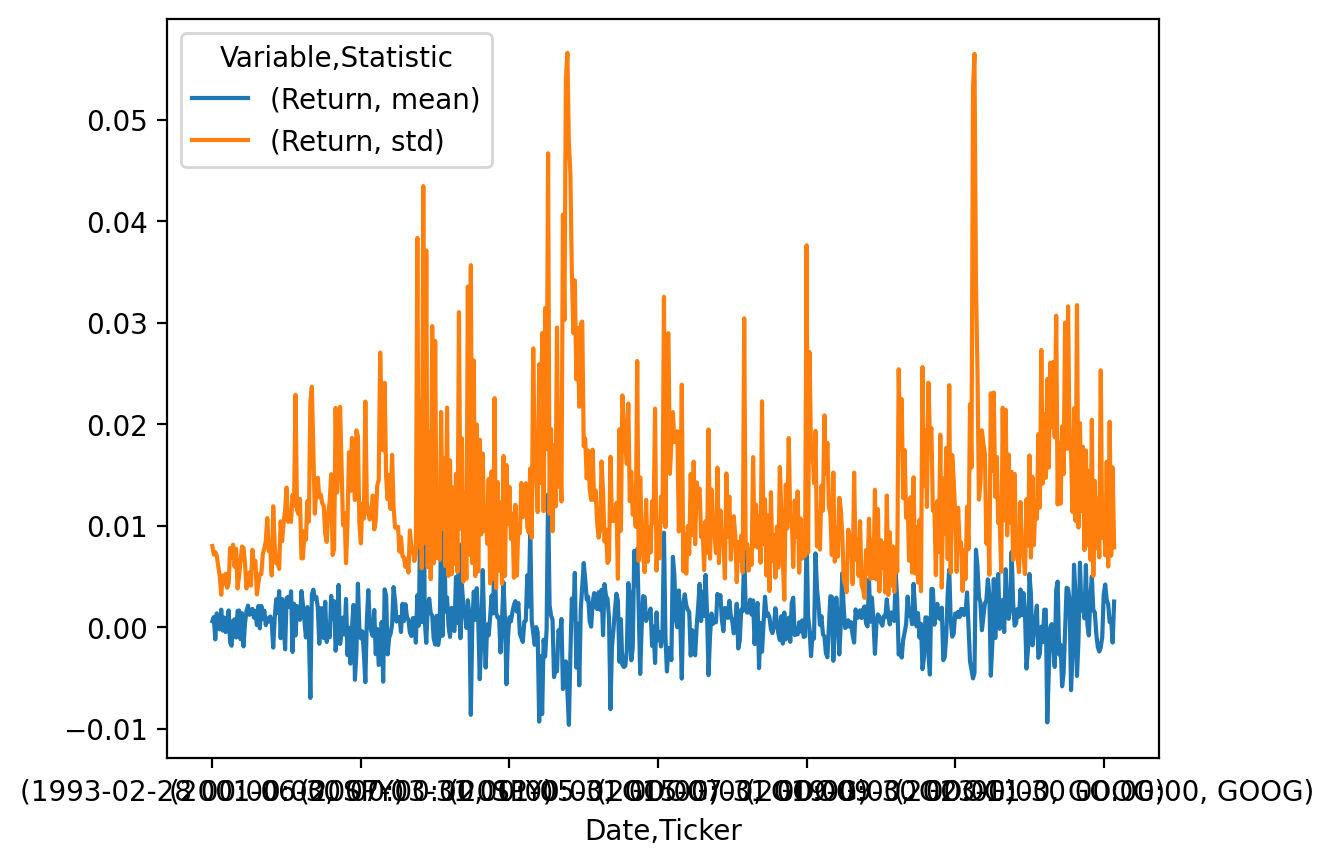

In [33]:
spy_goog_m.plot()

<Axes: xlabel='Date'>

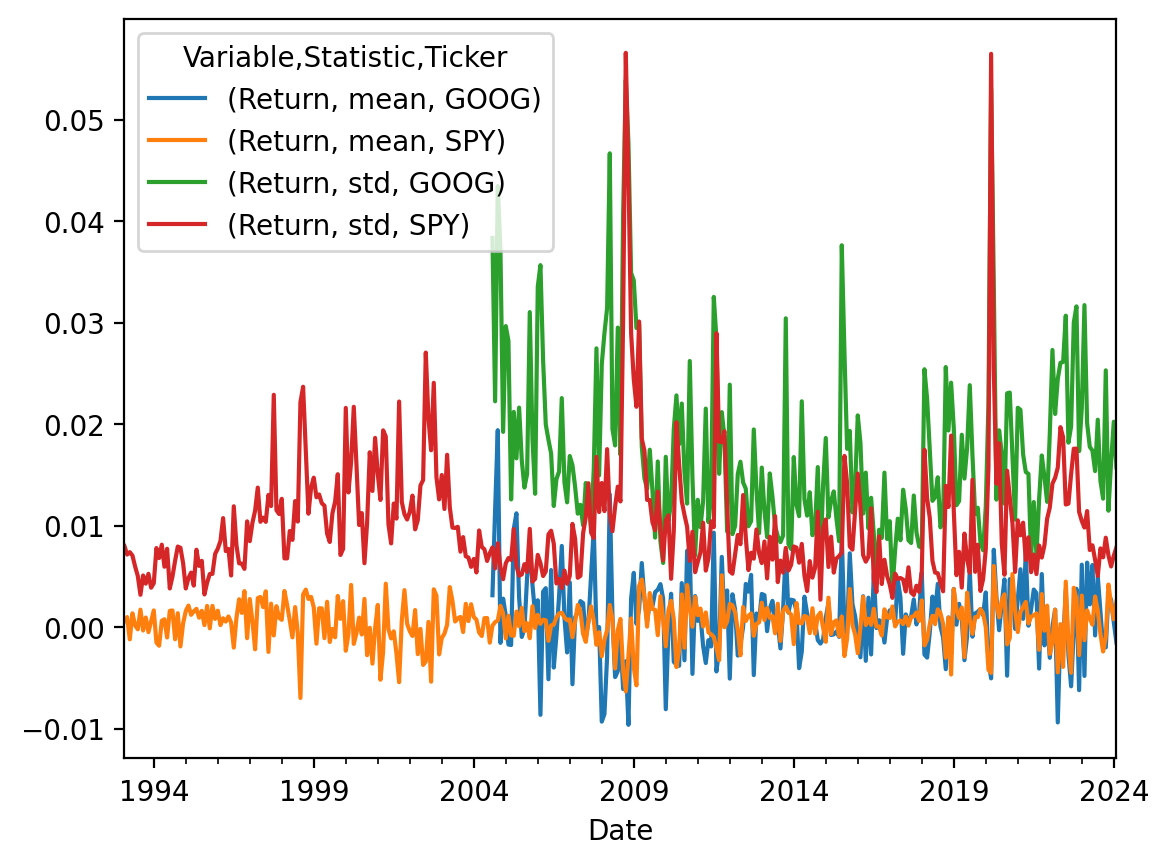

In [36]:
spy_goog_m.unstack().plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

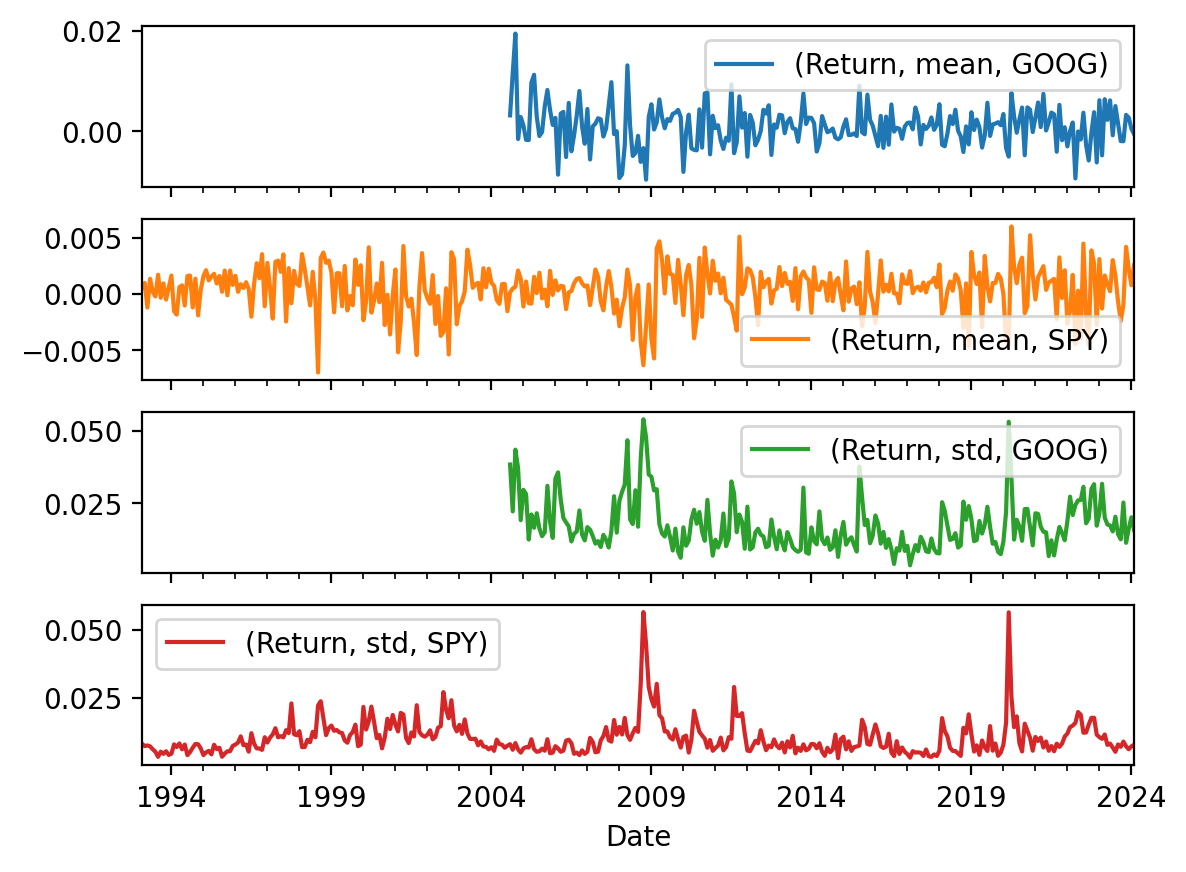

In [47]:
spy_goog_m.unstack().plot(subplots=True)

***We can make this plot better with the `seaborn` plotting package!***

In [37]:
import seaborn as sns

The `seaborn` makes excellent multi-panel plots, including plots with statistics.
***But, it requires very long data frames.***
A *very* long data frame has all of the y values in one column and all other useful dimensions as columns instead of indexes!

In [46]:
spy_goog_m.stack().reset_index().head()

Variable,Date,Ticker,Statistic,Return
0,1993-02-28,SPY,mean,0.0006
1,1993-02-28,SPY,std,0.0080
2,1993-03-31,SPY,mean,0.0010
3,1993-03-31,SPY,std,0.0071
4,1993-04-30,SPY,mean,-0.0012


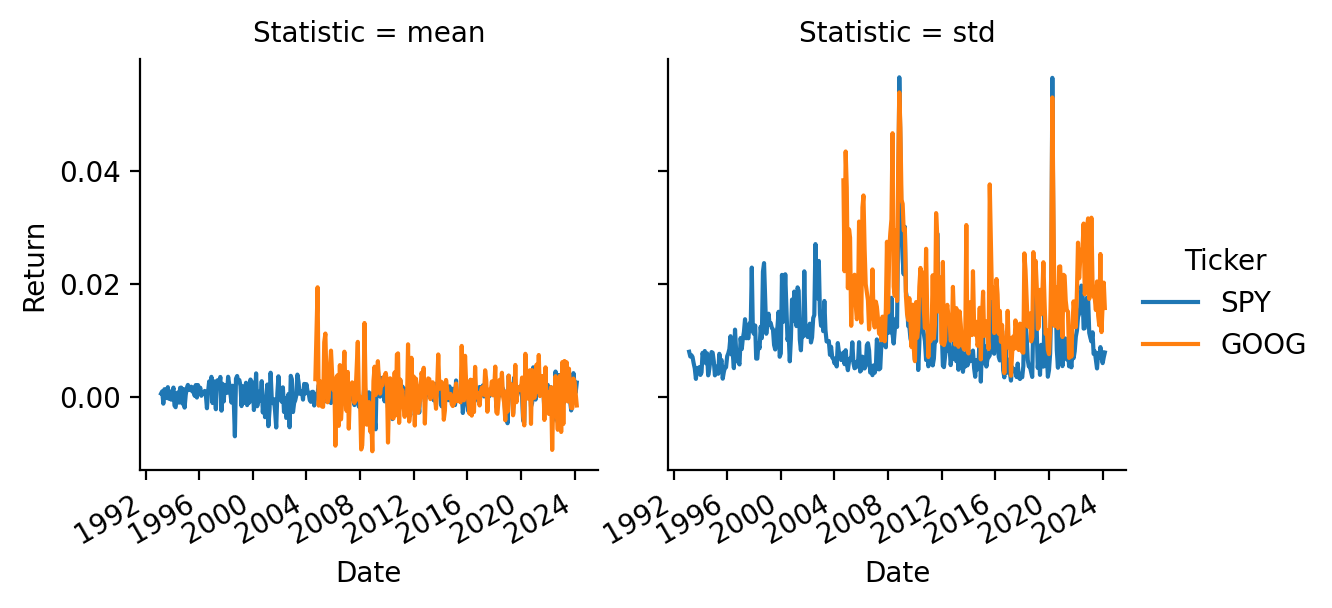

In [48]:
sns.relplot(
    data=spy_goog_m.stack().reset_index(),
    x='Date',
    y='Return',
    hue='Ticker',
    col='Statistic',
    height=3,
    kind='line',
    alpha=0.75
)

plt.gcf().autofmt_xdate()
plt.suptitle('Monthly Mean and Volatility of Daily Returns', y=1.05)
plt.show()

### Assign the Dow Jones stocks to five portfolios based on their monthly volatility

In [36]:
wiki = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')
wiki[1]['Symbol'].to_list()

['MMM',
 'AXP',
 'AMGN',
 'AMZN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WMT']

In [37]:
djia = (
    yf.download(tickers=wiki[1]['Symbol'].to_list())
    .rename_axis(columns=['Variable', 'Ticker'])
)

djia

[*********************100%%**********************]  30 of 30 completed


First, we add daily returns to `djia`.

In [44]:
_ = pd.MultiIndex.from_product([['Return'], djia['Adj Close']])
djia[_] = djia['Adj Close'].iloc[:-1].pct_change()

Second, we add monthly volatility of daily returns to each day.
The `.transform()` methods lets us add monthly volatility to the original daily data.

In [45]:
_ = pd.MultiIndex.from_product([['Volatility'], djia['Return']])
djia[_] = djia['Return'].groupby(pd.Grouper(freq='M')).transform('std')

Third, we use `pd.qcut()` to assign stocks to portfolios based on volatility.
Here is an example of how to use `pd.qcut()`.

In [46]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
pd.qcut(
    x=np.arange(10),
    q=2,
    labels=False
)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

We use the `.apply()` with `axis=1` to apply `pd.qcut` to every row in `djia['Volatility']` without writing a for loop.
We can also pass `q=5` and `labels=False` after we give the `pd.qcut` function name.

In [58]:
_ = pd.MultiIndex.from_product([['Portfolio'], djia['Volatility']])
djia[_] = djia['Volatility'].iloc[:-1].apply(pd.qcut, q=5, labels=False, axis=1)

### Plot the time-series volatilities of these five portfolios

In [69]:
djia.stack()

Variable           Adj Close    Close     High      Low     Open       Volume  \
Date       Ticker                                                               
1962-01-02 BA         0.1909   0.8230   0.8374   0.8230   0.8374  352350.0000   
           CAT        0.4767   1.6042   1.6198   1.5885   1.6042  163200.0000   
           CVX        0.3358   3.2961   3.2961   3.2440   0.0000  105840.0000   
           DIS        0.0582   0.0929   0.0960   0.0929   0.0929  841958.0000   
           HON        1.0740   8.3100   8.3287   8.2726   0.0000   40740.0000   
...                      ...      ...      ...      ...      ...          ...   
2024-03-01 TRV      220.2450 220.2450 221.0850 219.9000 220.9000   28335.0000   
           UNH      482.1600 482.1600 490.0200 481.5365 498.5000  982334.0000   
           V        283.9000 283.9000 284.9100 282.7200 283.2000  378060.0000   
           VZ        39.9750  39.9750  40.0500  39.7700  39.9900 1042012.0000   
           WMT       58.5250  58.5250  58.8090  58.5200  58.8000 1206478.0000   

Variable           Return  Volatility  Portfolio  
Date       Ticker                                 
1962-01-02 BA         NaN      0.0156     3.0000  
           CAT        NaN      0.0121     1.0000  
           CVX        NaN      0.0108     0.0000  
           DIS        NaN      0.0170     3.0000  
           HON        NaN      0.0097     0.0000  
...                   ...         ...        ...  
2024-03-01 TRV        NaN         NaN        NaN  
           UNH        NaN         NaN        NaN  
           V          NaN         NaN        NaN  
           VZ         NaN         NaN        NaN  
           WMT        NaN         NaN        NaN  

[351383 rows x 9 columns]

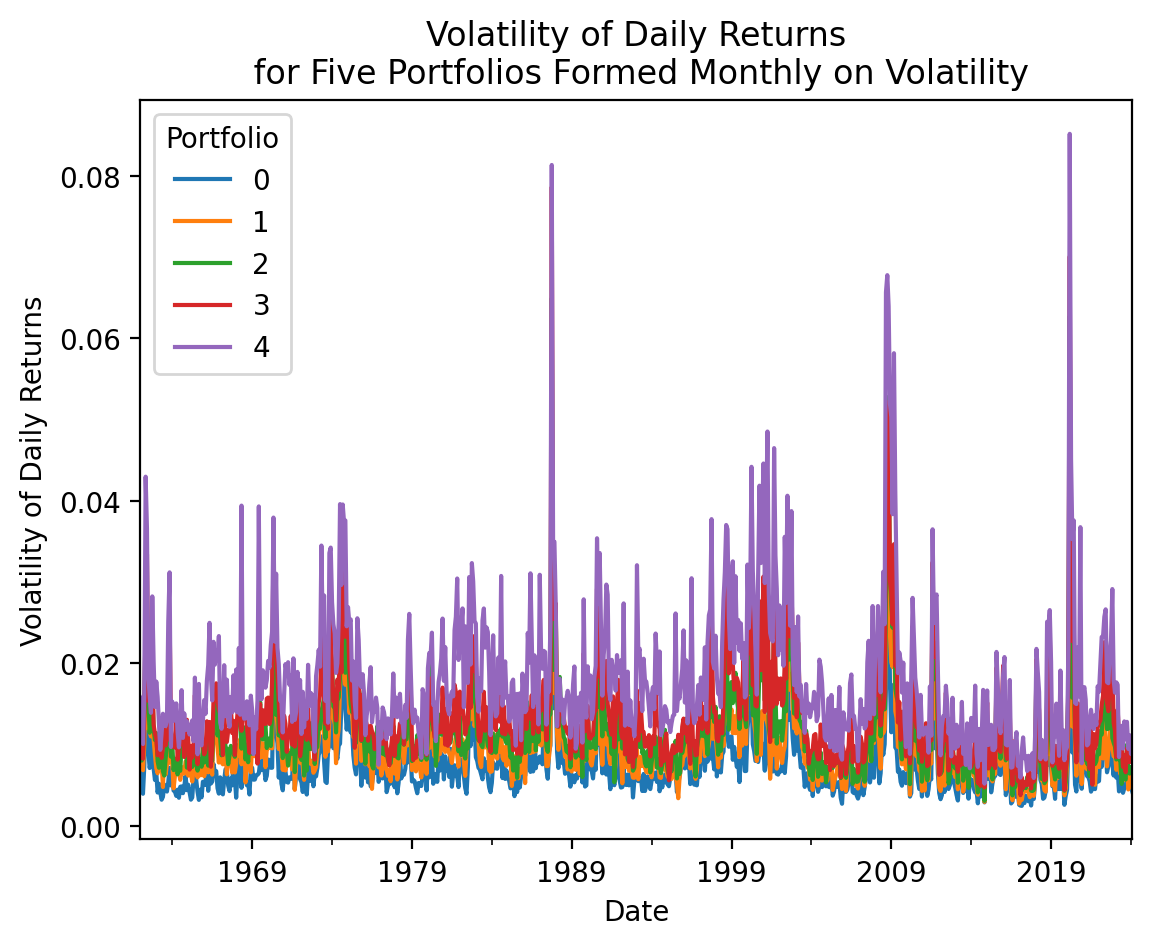

In [101]:
(
    djia
    .stack()
    .groupby(['Date', 'Portfolio'])
    ['Return']
    .mean()
    .reset_index()
    .dropna()
    .assign(Portfolio=lambda x: x['Portfolio'].astype(int))
    .groupby([pd.Grouper(key='Date', freq='M'), 'Portfolio'])
    .std()
    .rename(columns={'Return': 'Volatility'})
    .unstack()
    ['Volatility']
    .plot()
)

plt.ylabel('Volatility of Daily Returns')
plt.title('Volatility of Daily Returns\n for Five Portfolios Formed Monthly on Volatility')
plt.show()

### Calculate the *mean* monthly correlation between the Dow Jones stocks

*I may build Project 2 on this exercise, so I will leave it blank, for now.*

### Is market volatility higher during wars?

Here is some guidance:

1. Download the daily factor data from Ken French's website
1. Calculate daily market returns by summing the market risk premium and risk-free rates (`Mkt-RF` and `RF`, respectively)
1. Calculate the volatility (standard deviation) of daily returns *every month* by combining `pd.Grouper()` and `.groupby()`)
1. Multiply by $\sqrt{252}$ to annualize these volatilities of daily returns
1. Plot these annualized volatilities

Is market volatility higher during wars?
Consider the following dates:

1. WWII: December 1941 to September 1945
1. Korean War: 1950 to 1953
1. Viet Nam War: 1959 to 1975
1. Gulf War: 1990 to 1991
1. War in Afghanistan: 2001 to 2021

In [28]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [104]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900'
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_24320\2526882917.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_all = pdr.DataReader(


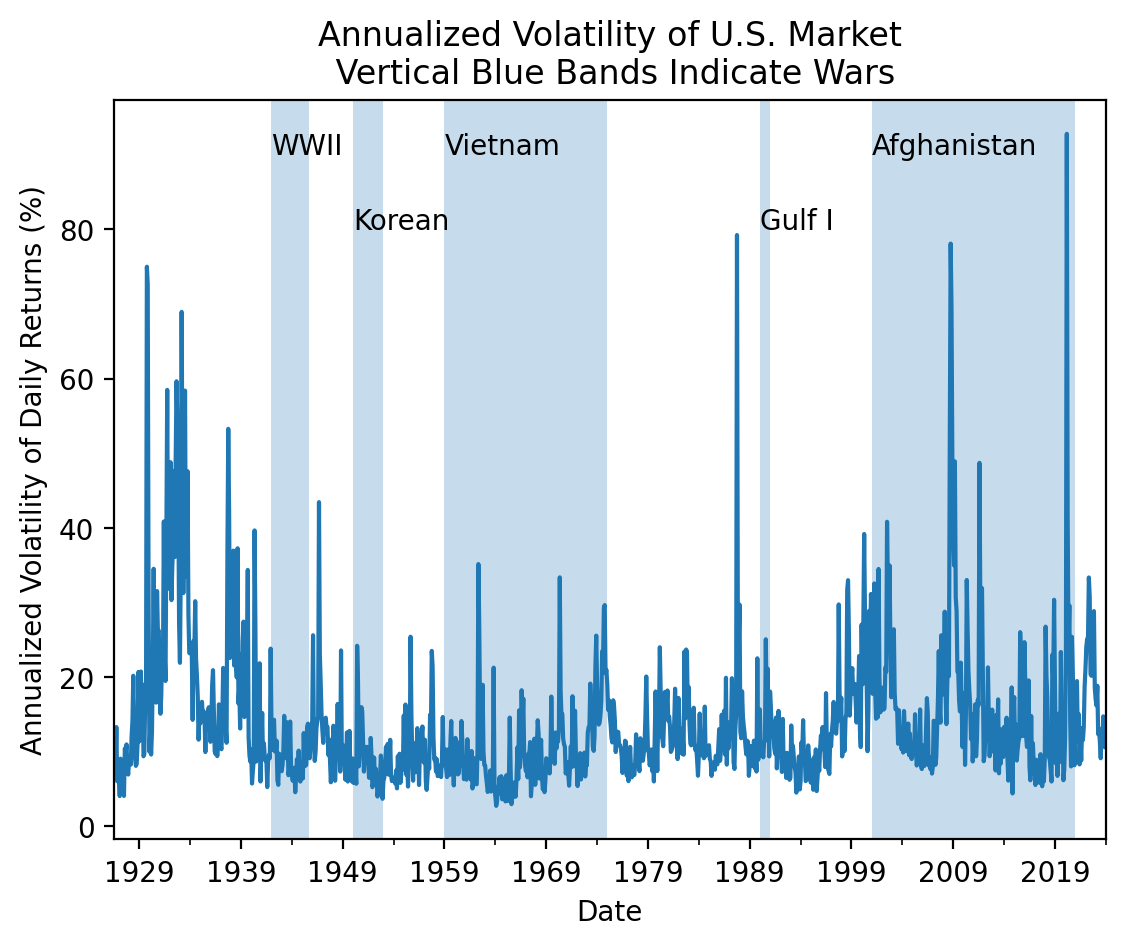

In [105]:
(
    ff_all[0]
    .assign(Mkt = lambda x: x['Mkt-RF'] + x['RF'])
    ['Mkt']
    .groupby(pd.Grouper(freq='M'))
    .std()
    .mul(np.sqrt(252))
    .plot()
)

# adds vertical bands for U.S. wars
plt.axvspan('1941-12', '1945-09', alpha=0.25)
plt.annotate('WWII', ('1941-12', 90))
plt.axvspan('1950', '1953', alpha=0.25)
plt.annotate('Korean', ('1950', 80))
plt.axvspan('1959', '1975', alpha=0.25)
plt.annotate('Vietnam', ('1959', 90))
plt.axvspan('1990', '1991', alpha=0.25)
plt.annotate('Gulf I', ('1990', 80))
plt.axvspan('2001', '2021', alpha=0.25)
plt.annotate('Afghanistan', ('2001', 90))

plt.ylabel('Annualized Volatility of Daily Returns (%)')
plt.title('Annualized Volatility of U.S. Market\n Vertical Blue Bands Indicate Wars')
plt.show()